# APS Failure at Scania Trucks

## Introduction

-The dataset consists of data collected from heavy Scania
trucks in everyday usage. The system in focus is the
Air Pressure system (APS) which generates pressurised
air that are utilized in various functions in a truck,
such as braking and gear changes. The datasets'
positive class consists of component failures
for a specific component of the APS system.
The negative class consists of trucks with failures
for components not related to the APS. The data consists
of a subset of all available data, selected by experts.


- The training set contains 60000 examples in total in which
59000 belong to the negative class and 1000 positive class.
The test set contains 16000 examples.

-  Number of Attributes: 171 

-  Attribute Information:
The attribute names of the data have been anonymized for
proprietary reasons. It consists of both single numerical
counters and histograms consisting of bins with different
conditions. Typically the histograms have open-ended
conditions at each end. For example if we measuring
the ambient temperature 'T' then the histogram could
be defined with 4 bins where:
- bin 1 collect values for temperature T < -20
- bin 2 collect values for temperature T >= -20 and T < 0
- bin 3 collect values for temperature T >= 0 and T < 20
- bin 4 collect values for temperature T > 20



In [ ]:
#import all the necessary libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix,f1_score,log_loss
import seaborn as sns
from sklearn.decomposition import pca
from datetime import datetime
from impyute.imputation.cs import mice
from tqdm import tqdm
import missingno as msno

## 1. Reading Data

### 1.1 Train Data

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)  # display all columns
train_data = pd.read_csv('aps_failure_training_set.csv')  #Obtain the training data from csv file
print('Shape : ',np.shape(train_data))
train_data.head(5)

Shape :  (60000, 171)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,na,na,na,na,na,na,na,na,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,120960

In [3]:
# Distribution of data
print("Train Data:")
print("Number of datapoints: {}\nNumber of Features: {}".format(train_data.shape[0],train_data.shape[1]))

Train Data:
Number of datapoints: 60000
Number of Features: 171


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [5]:
train_data.head(3)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0


### 1.2 Test Data

In [6]:
#Obtain the test data from csv file
test_data = pd.read_csv('aps_failure_test_set.csv')

In [7]:
print("Test Data:")
print("Number of datapoints: {}\nNumber of Features: {}".format(test_data.shape[0],test_data.shape[1]))

Test Data:
Number of datapoints: 16000
Number of Features: 171


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 20.9+ MB


In [9]:
test_data.head(3)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,2682,4736,3862,1846,0,0,0,3976,0,0,0,1520,2374,11516,9480,111258,470,0,0,0,0,58,26,0,0,0,0,0,0,0,0,13124,2,1956,434,76,174,190,6198,1148,2948,2,0,8762,2566,480,380,196,516,86,66,74,0,124340,4,6,4,0,3976,318,107662,3458,na,na,na,na,na,na,na,na,110980,59.53,124340,124340,184970,54,686,12246,123880,13196,1209600,598,0,6,0,5913.6,0,5851.2,6,30,0,2,5512,4674,1388,1508,38,4,0,0,8,12,124340,0,1550,14,36,26,920,430,7650,2294,206,0,22,42,5336,1276,0,0,0,0,6598,70,112,0,0,0,0,0,0,0,0,340,0,0,1100,574,232,66,780,882,0,4,0,0,0,465.5,90,7502,3156,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,0,748,12594,3636,0,0,0,5244,0,60,0,0,0,23174,18166,23686,1270,0,0,0,0,12,82,0,0,0,0,0,0,0,692,16286,0,280,44,50,1274,866,3362,11102,0,0,0,12564,1756,638,276,172,132,812,308,192,128,46894,4,2,38,0,5244,360,20520,3134,na,na,na,na,na,na,na,na,23320,81.89,46894,46894,48324,68,0,4486,46480,17050,1209600,726,2,4,0,7224.96,0,7768.32,0,42,0,0,4,7064,6200,2452,1246,12,0,0,14,54,46894,0,2202,28,114,350,700,1708,9622,2174,80,0,80,206,7802,1466,0,0,0,0,7918,78,40,0,0,0,0,0,0,0,0,352,0,0,3996,584,200,62,37580,3756,6368,36,0,0,0,2.86,102,10040,3310,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,199486,1358536,1952422,452706,25130,520,0,1891670,0,0,0,77898,110548,3605894,3291610,959756,286536,0,0,0,0,106,340,0,0,0,0,0,24286,681260,2808472,474782,0,22984,894,1162,1304,1856,388700,3424812,123828,23260,0,1662580,667960,387998,226078,161558,148288,154908,220820,147744,210866,4644422,958,7848,3624,0,1891670,47066,692800,265492,336240,194360,245240,na,na,na,na,na,175480,66002.89,4644422,4644422,4608738,22706,2272,95510,1006260,3991552,1209600,126310,0,104,0,3594885.12,0,374649.6,148,720,0,5154,174956,622312,1002504,793938,541734,345896,300806,201500,52,92,4644422,0,24818,964,162660,215004,217930,3038612,322718,6080,14,0,226,572,3593728,1911060,0,284,0,0,3613906,4218,692,0,0,0,0,0,0,0,0,25278,9438,2504,10262714,1278664,109700,19072,9520,4902,4434614,70900,0,0,26002880,2057.84,2158,396312,538136,495076,380368,440134,269556,1315022,153680,516,0,0,0


__Observations :__

__1. a. Training data consists of 60000 rows of data and 170 features with class as additional features__

   __b. Test data consists of 16000 rows of data and 170 features with class as additional features__

__2. Its a binary classification problem with class feature consists of either neg or pos status__

__3. For proprietary reasons, feature names are represented as identifier_bin e.g aa_000 or ee_006__

__4. 7 histograms with 10 variables or bins total makes it 70 features__

__5. ag_000 to ag_009, ay_000 to ay_009, az_000 to az_009, ba_000 to ba_009, cn_000 to cn_009, cs_000 to cs_009, ee_000 to ee_009 are 7 histogram in given attributes__

## 2.Data Preprocessing

### 2.1 Train Data

In [10]:
# processing all missing data and combining them in one format
train_data.replace(to_replace = ['nan','na','NA','n.a.','?','--','n/a'], value = np.NaN, inplace = True)

In [11]:
#replacing all class labels : train data
# Source : https://stackoverflow.com/questions/42320834/sklearn-changing-string-class-label-to-int
#neg = 0
#pos = 1
train_data['class'] = train_data['class'].map({'pos':1,'neg':0}) 

In [12]:
train_data.head(3)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,NaN,NaN,NaN,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,NaN,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,NaN,0,NaN,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,NaN,NaN,NaN,NaN,NaN,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,NaN,NaN,NaN,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,NaN,0,3646660,NaN,6160,796,164860,350066,272956,1837600,301242,9148,22,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,NaN,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,NaN,NaN,NaN,NaN,NaN,NaN,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,NaN,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(2), object(169)
memory usage: 78.3+ MB


In [14]:
train_data.isna().sum().sort_values(ascending=False)

br_000    49264
bq_000    48722
bp_000    47740
bo_000    46333
cr_000    46329
          ...  
cj_000      338
ck_000      338
bt_000      167
aa_000        0
class         0
Length: 171, dtype: int64

In [15]:
percent_missing =train_data.isna().sum()*100/len(train_data)
percent_missing.sort_values(ascending=False)

br_000    82.106667
bq_000    81.203333
bp_000    79.566667
bo_000    77.221667
cr_000    77.215000
            ...    
cj_000     0.563333
ck_000     0.563333
bt_000     0.278333
aa_000     0.000000
class      0.000000
Length: 171, dtype: float64

### 2.2 Test Data

In [16]:
#processing test data set
test_data.replace(to_replace = ['nan','na','NA','n.a.','?','--','n/a'], value = np.NaN, inplace = True)

In [17]:
#replacing all class labels : test data

#neg = 0
#pos = 1
test_data['class'] = test_data['class'].map({'pos':1,'neg':0})

In [18]:
test_data.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0,20,12,0,0,0,0,0,2682,4736,3862,1846,0,0,0,3976,0,0,0,1520,2374,11516,9480,111258,470,0,0,0,0,58,26,0,0,0,0,0,0,0,0,13124,2,1956,434,76,174,190,6198,1148,2948,2,0,8762,2566,480,380,196,516,86,66,74,0,124340,4,6,4,0,3976,318,107662,3458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110980,59.53,124340,124340,184970,54,686,12246,123880,13196,1209600,598,0,6,0,5913.6,0,5851.2,6,30,0,2,5512,4674,1388,1508,38,4,0,0,8,12,124340,0,1550,14,36,26,920,430,7650,2294,206,0,22,42,5336,1276,0,0,0,0,6598,70,112,0,0,0,0,0,0,0,0,340,0,0,1100,574,232,66,780,882,0,4,0,0,0,465.5,90,7502,3156,1098,138,412,654,78,88,0,0,0,0
1,0,82,0,68,40,0,0,0,0,0,0,748,12594,3636,0,0,0,5244,0,60,0,0,0,23174,18166,23686,1270,0,0,0,0,12,82,0,0,0,0,0,0,0,692,16286,0,280,44,50,1274,866,3362,11102,0,0,0,12564,1756,638,276,172,132,812,308,192,128,46894,4,2,38,0,5244,360,20520,3134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23320,81.89,46894,46894,48324,68,0,4486,46480,17050,1209600,726,2,4,0,7224.96,0,7768.32,0,42,0,0,4,7064,6200,2452,1246,12,0,0,14,54,46894,0,2202,28,114,350,700,1708,9622,2174,80,0,80,206,7802,1466,0,0,0,0,7918,78,40,0,0,0,0,0,0,0,0,352,0,0,3996,584,200,62,37580,3756,6368,36,0,0,0,2.86,102,10040,3310,1068,276,1620,116,86,462,0,0,0,0
2,0,66002,2,212,112,0,0,0,0,0,199486,1358536,1952422,452706,25130,520,0,1891670,0,0,0,77898,110548,3605894,3291610,959756,286536,0,0,0,0,106,340,0,0,0,0,0,24286,681260,2808472,474782,0,22984,894,1162,1304,1856,388700,3424812,123828,23260,0,1662580,667960,387998,226078,161558,148288,154908,220820,147744,210866,4644422,958,7848,3624,0,1891670,47066,692800,265492,336240,194360,245240,NaN,NaN,NaN,NaN,NaN,175480,66002.89,4644422,4644422,4608738,22706,2272,95510,1006260,3991552,1209600,126310,0,104,0,3594885.12,0,374649.6,148,720,0,5154,174956,622312,1002504,793938,541734,345896,300806,201500,52,92,4644422,0,24818,964,162660,215004,217930,3038612,322718,6080,14,0,226,572,3593728,1911060,0,284,0,0,3613906,4218,692,0,0,0,0,0,0,0,0,25278,9438,2504,10262714,1278664,109700,19072,9520,4902,4434614,70900,0,0,26002880,2057.84,2158,396312,538136,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,0,59816,NaN,1010,936,0,0,0,0,0,0,123922,984314,1680050,1135268,92606,14038,1772828,0,0,0,1116,2372,3546760,3053176,652616,423374,0,0,7274,0,1622,432,0,0,0,0,0,6388,1091104,2930694,2012,0,3526,904,1426,223226,2663348,1137664,104,0,0,0,1283806,928212,345132,265930,194770,158262,219942,620264,13880,0,4201350,98,238,880,16,1772828,51468,331744,316130,176000,208420,159380,NaN,NaN,NaN,NaN,NaN,100120,59816.46,4201350,4201350,4203050,29967.0,26214,51894,562680,4030198,1209600,114684,0,144,0,3387773.76,38633.28,599624.64,0,0,0,0,14308,475410,1109740,1528024,837114,58942,6220,440,1278,1292,4201350,NaN,6846,810,70090,345884,191284,2454600,926846,33558,280,0,1516,1398,2050280,64066,0,674,0,46,3413978

In [19]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: int64(2), object(169)
memory usage: 20.9+ MB


### 2.3 Creating Class Label

In [20]:
#Seperating the class labels : train data
y_train = train_data['class']
train_data.drop(['class'], axis = 1, inplace= True)

In [21]:
y_train.head(3)

0    0
1    0
2    0
Name: class, dtype: int64

In [22]:
#Seperating the class labels : test data
y_test = test_data['class']
test_data.drop(['class'], axis = 1, inplace= True)

In [23]:
y_test.head(3)

0    0
1    0
2    0
Name: class, dtype: int64

In [24]:
print('The shape of train data : {} and\nThe shape of class label : {}'.format(train_data.shape,y_train.shape))

The shape of train data : (60000, 170) and
The shape of class label : (60000,)


In [25]:
print('The shape of test data : {} and\nThe shape of class label : {}'.format(test_data.shape,y_test.shape))

The shape of test data : (16000, 170) and
The shape of class label : (16000,)


## 3 Initial Data Analysis

Exploratory Data Analysis is an approach to analyzing datasets to summarize their main characteristics, often with visual methods

The questions that are important to understand before starting with the process of exploratory data analysis:
- What is the question that I’m looking for in the given data set
- Which type of data does my data set contain
- To predict my target variable, which features are needed to be added or removed from the data set
- Are there any missing values present, if so, how to deal with it
- If there are any outliers, how do we remove them

- credit :https://towardsdatascience.com/exploratory-data-analysis-part-i-9825e658e668

__Observations : 1. only one features/attribute have all the values present hence dtype is integer, rest all with missing values have dtype as Object__

### 3.1 Train data & Test data

In [26]:
train_data.describe(include='all')

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671,56665,45139,57500,57500,59329,59329,59329,59329,59329,59329,59329,59329,59329,59329,59355,59371,59371,55600,59358,59371,59358,59411,59358,59411,57277,59371,59371,59371,57500,57499,59329,59329,59329,59329,59329,59329,59329,59329,59329,59329,59329,59329,59329,59329,59329,59329,59329,59329,59329,59329,59312,59312,59312,59312,59312,59312,59312,59312,59312,59312,59355,57275,57273,57497,57500,59358,59358,59411,59411,36966,32723,20451,15991,13667,12260,11278,10736,59274,59833,59309,59309,56743,59527,57277,55644,59274,56745,59324,57498,45139,45139,45139,59662,59662,59662,50447,50123,59313,59313,59313,59313,59313,59313,59313,59313,59313,59313,45139,57276,59309,13671,59331,59331,59331,59331,59331,59331,59331,59331,59331,59331,46192,46192,46192,46192,46192,46192,46192,46192,46192,57497,57276,55992,55992,55992,55994,55993,55993,55992,55991,59309,57276,57274,57274,57274,57273,57273,57274,57274,57277,57276,57277,57277,55993,49761,50447,59329,59329,59329,59329,59329,59329,59329,59329,59329,59329,57276,57277
unique,NaN,29,2061,1886,333,418,154,617,2422,7879,23071,40797,40615,32125,18932,5355,43571,4055,894,159,9017,10582,48204,47723,44672,34921,68,21,3511,56,3860,2215,466,919,986,1032,1767,19696,34628,38651,37822,447,9184,7378,9064,21530,34077,44601,12306,3876,1271,336,44840,40164,35958,32914,30673,29593,29281,25166,11816,6797,49392,2807,3565,3918,1098,43568,25240,42098,38359,12917,11969,9037,7096,5838,4968,4276,3806,12834,45480,49349,49346,52848,22627,16547,28318,30170,43859,1,22075,525,646,2,45964,7617,45043,972,2123,1530,5419,14789,34110,42086,38554,32426,21996,10117,3055,1860,2315,49347,74,9297,3343,28277,35193,34558,42558,40916,17300,773,53,2617,3519,32928,25236,748,10727,263,146,33177,6563,1893,402,1313,1055,5618,72,256,181,221,21098,20514,11568,8110,6682,26312,15910,28495,30139,14735,6311,47,134,27831,31141,3930,41815,38245,34488,31711,35188,36288,31795,30469,24213,9724,28,49
top,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1310700,1310700,1310700,1310700,1310700,1310700,1310700,1310700,0,0,0,0,202,0,0,0,0,0,1209600,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,NaN,10977,8752,2009,55543,55476,59133,58587,56181,46894,1305,1941,1238,15875,25091,40698,133,53588,46919,55227,37473,37295,129,140,113,230,54928,59350,53395,59310,10008,10191,58761,58192,58162,58078,57158,30338,16604,7432,4944,58789,1096,1458,1280,1184,1147,1129,8672,45094,54222,57445,1089,1139,1172,1204,1236,1328,1997,8038,24854,39619,107,19296,4030,6951,25294,133,129,117,137,1942,2805,3181,3507,3657,3752,3824,3886,120,131,107,107,31,1224,13841,109,109,878,59324,11845,2146

In [27]:
#Calculating the number of missing values
missing_value = train_data.isnull().sum()
missing_value_test = test_data.isnull().sum()

# sorting features with missing value : highest to lowest
missing_col = missing_value.sort_values(ascending = False)
missing_col_test = missing_value_test.sort_values(ascending=False)
print('Missing value proportion for train data: \n',missing_col)
print('\nMissing value proporation for test data: \n',missing_col_test)

Missing value proportion for train data: 
 br_000    49264
bq_000    48722
bp_000    47740
bo_000    46333
cr_000    46329
          ...  
ci_000      338
cj_000      338
ck_000      338
bt_000      167
aa_000        0
Length: 170, dtype: int64

Missing value proporation for test data: 
 br_000    13129
bq_000    12981
bp_000    12721
bo_000    12376
cr_000    12363
          ...  
ci_000       86
cj_000       86
ck_000       86
bt_000       28
aa_000        0
Length: 170, dtype: int64


In [28]:
#calculating missing value persentage for every features
missing_per = (missing_col/len(train_data))*100
missing_per_test = (missing_col_test/len(test_data))*100
print('Missing value percentage of train data: \n',missing_per)
print('\nMissing value percentage of test data: \n',missing_per_test)

Missing value percentage of train data: 
 br_000    82.106667
bq_000    81.203333
bp_000    79.566667
bo_000    77.221667
cr_000    77.215000
            ...    
ci_000     0.563333
cj_000     0.563333
ck_000     0.563333
bt_000     0.278333
aa_000     0.000000
Length: 170, dtype: float64

Missing value percentage of test data: 
 br_000    82.05625
bq_000    81.13125
bp_000    79.50625
bo_000    77.35000
cr_000    77.26875
            ...   
ci_000     0.53750
cj_000     0.53750
ck_000     0.53750
bt_000     0.17500
aa_000     0.00000
Length: 170, dtype: float64


__observations :__ 
__1. Except the first one with integer dtype, almost all the columns have missing values__

__2. All the values are numerical in nature with missing values range from 0.3% to 82% in their respective features__

__3. describe does not provide much info due to lot of missing values__

__4. Calculating outliers with lot of missing values is quiet tough__


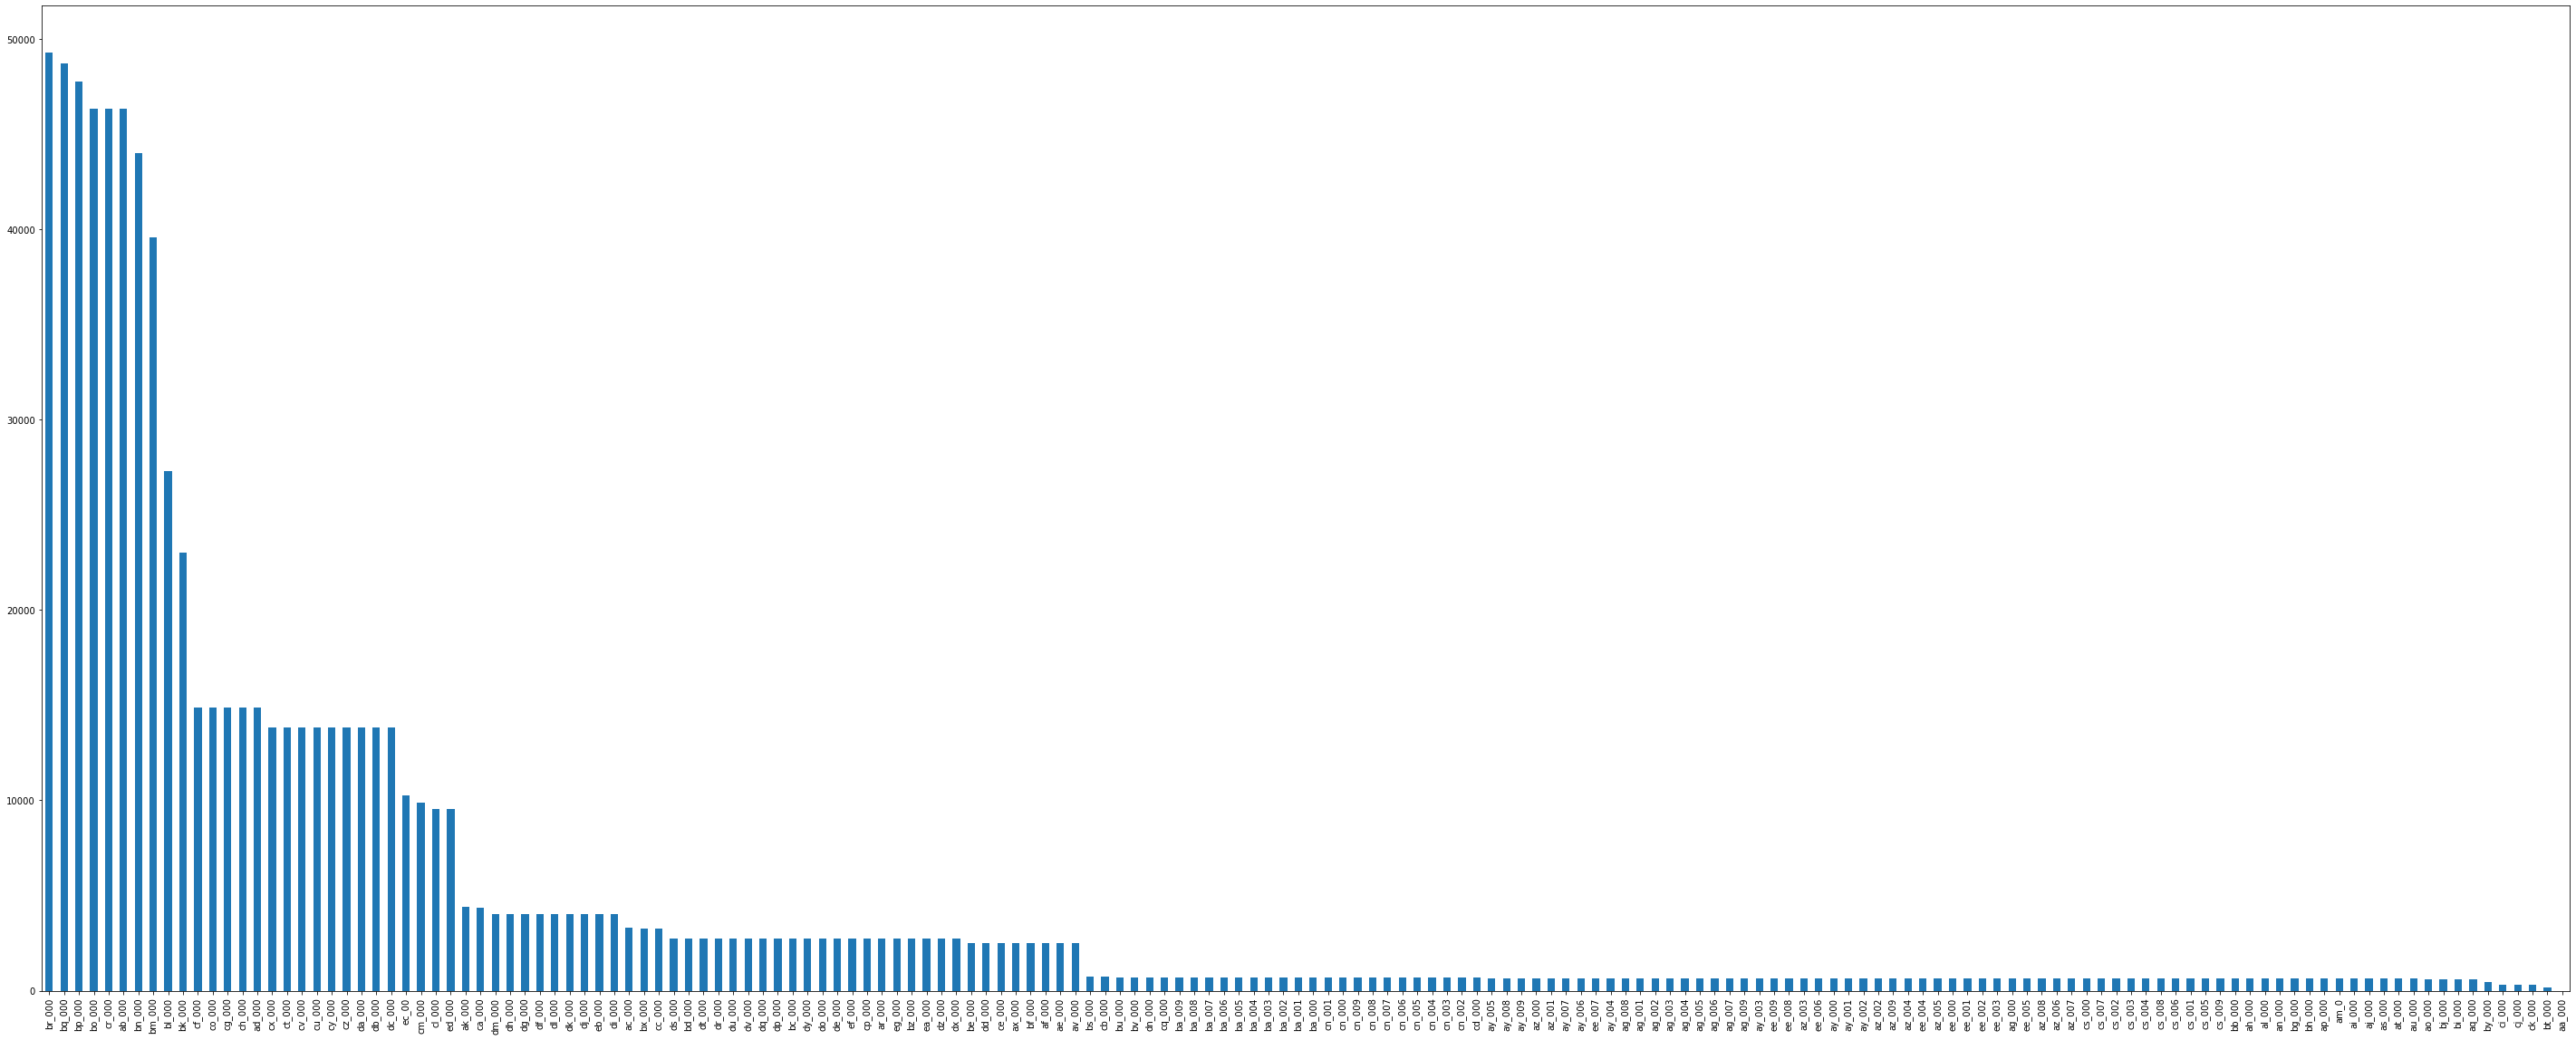

In [29]:
#plotting the features with missing values
missing_col.plot.bar(figsize=(50,20))
plt.show()

__Observation: The first few features are the one with highest number of missing values__

In [30]:
# Code to identify rows which contains features(less than 5% missing values)

missing_rvalue = train_data.isnull().sum(axis=1)
missing_row = missing_rvalue.sort_values(ascending = False)
print(missing_row)

13028    168
28180    168
53885    168
3959     168
14255    168
        ... 
3481       0
10249      0
40780      0
49009      0
26962      0
Length: 60000, dtype: int64


### Handling missing values

 1. For features with mssing value greater than 85%, drop those features
 2. For features with missing value less than 5%, drop those rows
 3. For features with missing value between 5% to 20%, use median or mode imputation according to feature type
 4. For all features with mssing value between 20% to 85% use model based imputation



### 1.  Dropping columns ( missing value >85%)

- Total number of columns = 170
- No of columns where more than 85% missing values are present : Nil

In [31]:
# Identifying features having higher percentage of missing value
missing_features1 = missing_per[missing_per > 85].index
train_data1 = train_data.drop(missing_features1,axis=1,inplace=False)
print(train_data1.shape)

(60000, 170)


In [32]:
train_data1.isnull().sum()

aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
ae_000     2500
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 170, dtype: int64

### 2.  Dropping rows ( missing value <5%)

- Total number of row = 60000
- Finding no of rows where less than 5% missing values are present :

In [33]:
#missing feature 2 is the one with missing value less than 5%

missing_feature2 = missing_per[missing_per < 5].index

print(missing_feature2)

Index(['ds_000', 'bd_000', 'dt_000', 'dr_000', 'du_000', 'dv_000', 'dq_000',
       'dp_000', 'bc_000', 'dy_000',
       ...
       'ao_000', 'bj_000', 'bi_000', 'aq_000', 'by_000', 'ci_000', 'cj_000',
       'ck_000', 'bt_000', 'aa_000'],
      dtype='object', length=128)


In [34]:
# checking after removing the missing values from missing feature 2
train_data2 = train_data1.dropna(subset = missing_feature2,axis=0,inplace=False)
print(train_data2)

       aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0       76698    NaN  2130706438    280      0      0      0      0      0   
1       33058    NaN           0    NaN      0      0      0      0      0   
2       41040    NaN         228    100      0      0      0      0      0   
3          12      0          70     66      0     10      0      0      0   
4       60874    NaN        1368    458      0      0      0      0      0   
...       ...    ...         ...    ...    ...    ...    ...    ...    ...   
59995  153002    NaN         664    186      0      0      0      0      0   
59996    2286    NaN  2130706538    224      0      0      0      0      0   
59997     112      0  2130706432     18      0      0      0      0      0   
59998   80292    NaN  2130706432    494      0      0      0      0      0   
59999   40222    NaN         698    628      0      0      0      0      0   

      ag_003 ag_004   ag_005   ag_006   ag_007  ag_008 ag_009  

In [35]:
# Converting Object into numeric features
for mis in missing_feature2:
    train_data2[mis] = pd.to_numeric(train_data2[mis],errors='coerce')

In [36]:
#confirming the conversion
print(train_data2['bt_000'].dtypes)

float64


In [37]:
train_data2[missing_feature2].isna().sum()

ds_000    0
bd_000    0
dt_000    0
dr_000    0
du_000    0
         ..
ci_000    0
cj_000    0
ck_000    0
bt_000    0
aa_000    0
Length: 128, dtype: int64

In [38]:
train_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55936 entries, 0 to 59999
Columns: 170 entries, aa_000 to eg_000
dtypes: float64(5), int64(123), object(42)
memory usage: 73.0+ MB


__Observations :1. total 128 features have missing values less than 5%__

__2. total 464 rows share the features having missing value less than 5% and they are removed__

__3. All these 128 features are converted to numerical data type__

__4. all features are still intact and Nan values have been removed from 128 columns so far__

__5. Since, we are not deleting any of the rows for test data, we are not performing this operation for test data__

### 3.  Median Imputation ( missing value between 5% to 20%)

- Total number of row (dataset) = 55936 
- Total number of columns(features) = 170

In [39]:
#missing feature 3 is the feature with missing values between 5% to 20%
missing_feature3 = ((missing_per[missing_per >= 5].index) & (missing_per[missing_per < 20].index))
print(missing_feature3)

Index(['ec_00', 'cm_000', 'cl_000', 'ed_000', 'ak_000', 'ca_000', 'dm_000',
       'dh_000', 'dg_000', 'df_000', 'dl_000', 'dk_000', 'dj_000', 'eb_000',
       'di_000', 'ac_000', 'bx_000', 'cc_000'],
      dtype='object')


In [40]:
#printing the training having only missing feature 3
train_data3 = train_data2[missing_feature3]
train_data3.head()

,ec_00,cm_000,cl_000,ed_000,ak_000,ca_000,dm_000,dh_000,dg_000,df_000,dl_000,dk_000,dj_000,eb_000,di_000,ac_000,bx_000,cc_000
0,2445.8,1924,6,2712,0,54064,0,0,0,0,0,0,0,2801180,0,2130706438,6599892,6167850
1,2211.76,0,0,2334,0,115626,0,0,0,0,0,0,0,3477820,0,0,3582034,2942850
2,1018.64,0,0,1020,0,22436,0,0,0,0,0,0,0,1040120,0,228,2678534,2560566
3,1.08,16,2,54,0,1994,0,0,0,0,0,0,0,0,0,70,21772,7710
4,1116.06,746,0,1176,0,61844,0,0,0,0,0,0,0,21173050,0,1368,4283332,3946944


In [41]:
train_data3.isna().sum()

ec_00     7598
cm_000    7335
cl_000    7098
ed_000    7098
ak_000    1367
ca_000    1412
dm_000    1210
dh_000    1210
dg_000    1210
df_000    1210
dl_000    1210
dk_000    1210
dj_000    1210
eb_000    1210
di_000    1210
ac_000     547
bx_000    1205
cc_000    1205
dtype: int64

In [42]:
#processing features (missing feature 3) with median imputation

for mis in missing_feature3:
    train_data2[mis] = train_data2[mis].fillna(train_data2[mis].median())

In [43]:
train_data2[missing_feature3].head()

,ec_00,cm_000,cl_000,ed_000,ak_000,ca_000,dm_000,dh_000,dg_000,df_000,dl_000,dk_000,dj_000,eb_000,di_000,ac_000,bx_000,cc_000
0,2445.8,1924,6,2712,0,54064,0,0,0,0,0,0,0,2801180,0,2130706438,6599892,6167850
1,2211.76,0,0,2334,0,115626,0,0,0,0,0,0,0,3477820,0,0,3582034,2942850
2,1018.64,0,0,1020,0,22436,0,0,0,0,0,0,0,1040120,0,228,2678534,2560566
3,1.08,16,2,54,0,1994,0,0,0,0,0,0,0,0,0,70,21772,7710
4,1116.06,746,0,1176,0,61844,0,0,0,0,0,0,0,21173050,0,1368,4283332,3946944


In [44]:
# Converting Object into numeric features
for mis in missing_feature3:
    train_data2[mis] = pd.to_numeric(train_data2[mis],errors='coerce')

In [45]:
#unprocessed feature
print(train_data2['ad_000'].isnull().sum())

11810


In [46]:
train_data2.isna().sum().sort_values(ascending=False)

br_000    47702
bq_000    47164
bp_000    46198
bo_000    44804
ab_000    42827
          ...  
cn_007        0
cn_006        0
cn_005        0
cn_004        0
aa_000        0
Length: 170, dtype: int64

In [47]:
train_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55936 entries, 0 to 59999
Columns: 170 entries, aa_000 to eg_000
dtypes: float64(23), int64(123), object(24)
memory usage: 73.0+ MB


__Observations : 1. 18 features have missing data between 5% to 20%__

__2. we have used median imputation for replacing missing data__

__3. features ad_000 displays 11880 (<20% of original 60000) but then it is processed in our median imputation because, originally, it was 14861__

__4. for last and 4th step, we have 24 unprocessed features with missing value__

In [48]:
#getting the missing value feature
cols_nan = train_data2.columns[train_data2.isna().any()].tolist()
print(len(cols_nan))
print(cols_nan)

24
['ab_000', 'ad_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'cf_000', 'cg_000', 'ch_000', 'co_000', 'cr_000', 'ct_000', 'cu_000', 'cv_000', 'cx_000', 'cy_000', 'cz_000', 'da_000', 'db_000', 'dc_000']


In [49]:
print(train_data2[cols_nan].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55936 entries, 0 to 59999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ab_000  13109 non-null  object
 1   ad_000  44126 non-null  object
 2   bk_000  34190 non-null  object
 3   bl_000  30003 non-null  object
 4   bm_000  17855 non-null  object
 5   bn_000  13434 non-null  object
 6   bo_000  11132 non-null  object
 7   bp_000  9738 non-null   object
 8   bq_000  8772 non-null   object
 9   br_000  8234 non-null   object
 10  cf_000  44126 non-null  object
 11  cg_000  44126 non-null  object
 12  ch_000  44126 non-null  object
 13  co_000  44126 non-null  object
 14  cr_000  13109 non-null  object
 15  ct_000  44648 non-null  object
 16  cu_000  44648 non-null  object
 17  cv_000  44648 non-null  object
 18  cx_000  44648 non-null  object
 19  cy_000  44648 non-null  object
 20  cz_000  44648 non-null  object
 21  da_000  44648 non-null  object
 22  db_000  44648 non-null

In [50]:
cols_no_nan = train_data2.columns.difference(cols_nan).values.tolist()
print(len(cols_no_nan))
print(cols_no_nan)

146
['aa_000', 'ac_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'ci_000', 'cj_000', 'ck_000', 'cl_000', 'cm_000', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'cp_000', 'cq_000', 'cs_000', 'cs_001

In [51]:
print(train_data2[cols_no_nan].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55936 entries, 0 to 59999
Columns: 146 entries, aa_000 to eg_000
dtypes: float64(23), int64(123)
memory usage: 62.7 MB
None


__Observations : 1. cols_no_nan represents 146 feature columns which we have already processed__

__2. col_nan defines the feature column that need to processed and we have 24 of them__

### 4.  Model based Imputation ( missing value between 20% to 85%)

- Total number of row (dataset) = 55936 
- Total number of columns(features) = 170

In [52]:
# Features with missing values type 4:
missing_feature4 = ((missing_per[missing_per >= 20].index) & (missing_per[missing_per < 85].index))
print('Type 4 missing features are:',missing_feature4)

#type conversion
print('Type before conversion:',type(missing_feature4)) 
missing_feature4 = list(missing_feature4)
print('Type after conversion:',type(missing_feature4))

Type 4 missing features are: Index(['br_000', 'bq_000', 'bp_000', 'bo_000', 'cr_000', 'ab_000', 'bn_000',
       'bm_000', 'bl_000', 'bk_000', 'cf_000', 'co_000', 'cg_000', 'ch_000',
       'ad_000', 'cx_000', 'ct_000', 'cv_000', 'cu_000', 'cy_000', 'cz_000',
       'da_000', 'db_000', 'dc_000'],
      dtype='object')
Type before conversion: <class 'pandas.core.indexes.base.Index'>
Type after conversion: <class 'list'>


In [53]:
# Displaying missing values count
train_data3 = train_data2[missing_feature4]
print(train_data3.isna().sum().sort_values(ascending=False))

br_000    47702
bq_000    47164
bp_000    46198
bo_000    44804
cr_000    42827
ab_000    42827
bn_000    42502
bm_000    38081
bl_000    25933
bk_000    21746
cf_000    11810
co_000    11810
cg_000    11810
ch_000    11810
ad_000    11810
db_000    11288
cx_000    11288
ct_000    11288
cv_000    11288
cu_000    11288
cy_000    11288
cz_000    11288
da_000    11288
dc_000    11288
dtype: int64


In [54]:
print(train_data2.shape)

(55936, 170)


In [55]:
#creating the copy of final data
df = train_data2
df[missing_feature4].describe()

,br_000,bq_000,bp_000,bo_000,cr_000,ab_000,bn_000,bm_000,bl_000,bk_000,cf_000,co_000,cg_000,ch_000,ad_000,cx_000,ct_000,cv_000,cu_000,cy_000,cz_000,da_000,db_000,dc_000
count,8234,8772,9738,11132,13109,13109,13434,17855,30003,34190,44126,44126,44126,44126,44126,44648,44648,44648,44648,44648,44648,44648,44648,44648
unique,2763,3167,3818,4687,54,29,6007,8036,11113,12041,459,1817,623,2,1836,24409,2534,31922,3290,634,10323,253,141,32138
top,1310700,1310700,1310700,1310700,0,0,1310700,1310700,1310700,1310700,0,0,4,0,0,0,0,0,0,0,0,0,0,0
freq,3754,3692,3620,3528,13052,10545,3383,3072,2715,1886,20821,12516,2850,44118,1922,1570,2094,986,2082,38451,8731,44136,26309,986


In [56]:
# getting top 3 most occured values for every feature
df6 = pd.DataFrame()
df2 = pd.DataFrame()
#miss = cols_nan
miss = missing_feature4
for d in miss:
    miss_val = df[d]
    df2[d] = miss_val.value_counts(dropna=False)
    dfs = df2[d][:3]
    #print(dfs)
    print(df6.append(dfs))
    print('-'*50)

            NaN      0  1310700
br_000  47702.0  828.0   3754.0
--------------------------------------------------
            NaN      0  1310700
bq_000  47164.0  819.0   3692.0
--------------------------------------------------
            NaN      0  1310700
bp_000  46198.0  794.0   3620.0
--------------------------------------------------
            NaN      0  1310700
bo_000  44804.0  768.0   3528.0
--------------------------------------------------
            NaN        0  1310700
cr_000  42827.0  13052.0      NaN
--------------------------------------------------
            NaN        0  1310700
ab_000  42827.0  10545.0      NaN
--------------------------------------------------
            NaN      0  1310700
bn_000  42502.0  739.0   3383.0
--------------------------------------------------
            NaN      0  1310700
bm_000  38081.0  657.0   3072.0
--------------------------------------------------
            NaN      0  1310700
bl_000  25933.0  554.0   2715.0
--------

__Observation : 1. missing values ranges from 19% to 79% of total individual feature values__

__2. features with 0 values ranges from 5% to 74% of total feature values__

__3. Nearly 12 features have summation of NaN and 0 crossing 60% of total feature values. It means they contribute only 40% input for decidin the outcome__

__4. value 0 may have some significance, but then we need to figure it out__

In [57]:
#getting shape of every feature to be imputed
#cols_nan and missing_feature4 are one and the same
for col in cols_nan:
    test_data = df[df[col].isna()]
    X_test = test_data[cols_no_nan]
    print(X_test.shape)

(42827, 146)
(11810, 146)
(21746, 146)
(25933, 146)
(38081, 146)
(42502, 146)
(44804, 146)
(46198, 146)
(47164, 146)
(47702, 146)
(11810, 146)
(11810, 146)
(11810, 146)
(11810, 146)
(42827, 146)
(11288, 146)
(11288, 146)
(11288, 146)
(11288, 146)
(11288, 146)
(11288, 146)
(11288, 146)
(11288, 146)
(11288, 146)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
start = datetime.now()
for col in cols_nan:
    print('-'*100)
    #Creating the train data
    train_data = df.dropna()
    X_train = train_data[cols_no_nan] 
    print('Shape of X_train data:',X_train.shape)
    y_train = train_data[col]
    print('Shape of y_train data:',y_train.shape)
    
    #creating the test data
    test_data = df[df[col].isna()]
    X_test = test_data[cols_no_nan]
    print('Shape of X_test data:',X_test.shape)
    y_test = test_data[col]
    print('Shape of y_test data:',y_test.shape)
    
    #using the model based imputation
    rf = RandomForestRegressor()
    rfr = rf.fit(X_train,y_train)
    
    #replacing the actual features
    df.loc[df[col].isna(),col] = rfr.predict(X_test)
    print('The feature {} is processed'.format(col))

print('the time taken to process this cell : ', datetime.now()-start)

----------------------------------------------------------------------------------------------------
Shape of X_train data: (838, 146)
Shape of y_train data: (838,)
Shape of X_test data: (42827, 146)
Shape of y_test data: (42827,)
The feature ab_000 is processed
----------------------------------------------------------------------------------------------------
Shape of X_train data: (838, 146)
Shape of y_train data: (838,)
Shape of X_test data: (11810, 146)
Shape of y_test data: (11810,)
The feature ad_000 is processed
----------------------------------------------------------------------------------------------------
Shape of X_train data: (838, 146)
Shape of y_train data: (838,)
Shape of X_test data: (21746, 146)
Shape of y_test data: (21746,)
The feature bk_000 is processed
----------------------------------------------------------------------------------------------------
Shape of X_train data: (838, 146)
Shape of y_train data: (838,)
Shape of X_test data: (25933, 146)
Shape of y_

In [ ]:
#Converting object features into numeric one
for mis in missing_feature4:
    df[mis] = pd.to_numeric(df[mis],errors='coerce')

# Saving the data in csv file
df['class'] = y_tr
df.to_csv('processed_impute_data.csv',index=False)

## Exploratory Data Analysis on processed data

In [ ]:
# reading the data for EDA
dataset = pd.read_csv('processed_impute_data.csv')
dataset

In [ ]:
#dropping extra column
dataset.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
dataset.describe(include='all')

In [ ]:
print((dataset['ae_000']==0.0).value_counts())

__Observations: 1. processed data is free from missing values__

__2. Some features where more number of data is zero resulting into all values as zero for 25th,75th percentile e.g ae_000__

__3. Maximum value differs from 75th percentile for many columns__

__4. Most of the columns seem reduntant, need to check with VIF and PCA__

In [ ]:
#After data preprocessing
#bar chart 
train_class_distribution = dataset['class'].value_counts()
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per class')
plt.title('Distribution of train data classes')
plt.grid()
plt.show()


__Observation : Highly imbalanced dataset__

## 1.Multicollinearity

### 1.1 VIF calculation

In [ ]:
#Source : https://towardsdatascience.com/how-to-detect-and-deal-with-multicollinearity-9e02b18695f1
# import vif

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    VIF_scores = pd.DataFrame()
    VIF_scores['variables'] = X.columns
    VIF_scores['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    
    return VIF_scores


In [ ]:
#Selecting the dataset all but one
start = datetime.now()
X = dataset.iloc[:,:-1]
scores = calc_vif(X)
print(scores)
print('Time taken to process this cell:',datetime.now()-start)

In [ ]:
#sort based on VIF scores
score_vif = scores.sort_values(by = ['VIF'],ascending=False)

# displaying top 5 values
multi_col = score_vif[:5]
print('Top 5 values:\n',multi_col)

# how many VIF score is greater than 10
vif_per = scores[scores['VIF'].values > 10]
print('List of VIF score greater than 10:\n',vif_per)

In [ ]:
#print highest VIF value
multi_col_VIF = multi_col['VIF'].values[0]
var_name = multi_col['variables'].values[0]
print(var_name,multi_col_VIF)

In [ ]:
#https://stackoverflow.com/questions/19211828/using-any-and-all-to-check-if-a-list-contains-one-set-of-values-or-another
my_list = [None]*5
def is_greater_than_5():
    for i in range(5):
        my_list[i] = multi_col['VIF'].values[i]>5
    #all 5 values are true then return list
    return all(my_list)               

### 1.2 Recursive VIF calculation

In [ ]:
#multi_col_VIF = score_vif['VIF'][0]
while(multi_col_VIF > 5):
    dataset.drop(multi_col['variables'],axis=1,inplace=True)
    #Selecting the dataset all but one
    start = datetime.now()
    X = dataset.iloc[:,:-1]
    scores = calc_vif(X)
    print(scores.shape)
    print('Time taken to process this cell:',datetime.now()-start)
    
    #sort based on VIF scores
    sort_vif = scores.sort_values(by = ['VIF'],ascending=False)
    # how many VIF score is greater than 10
    A = is_greater_than_5()
    if A is True :
        multi_col = sort_vif[:5]
        print('\ntop 5 - highly multicollinear variable:\n')
        print(multi_col)
        print('\n')
        print('Will be removed in next iteration')
    else:
        multi_col = sort_vif[:1]
        print('Only 1 - highly multicollinear variable:\n')
        print(multi_col)
        print('\n')
        print('Will be removed in next iteration')
    
    multi_col_VIF = multi_col['VIF'].values[0]
    print(multi_col_VIF)
    print('\n')

In [ ]:
print(dataset.shape)

In [ ]:
print(dataset.columns)

- A rule of thumb for interpreting the variance inflation factor:

1 = not correlated.
Between 1 and 5 = moderately correlated.
Greater than 5 = highly correlated.

__Observations : 1. Variance Inflation factor identifies column with multicollinearity__

__2. If we take the reference of 10, we have 112 highly multicorrelated features__

__3. Since, we dont have details of actual feature and their name, we cant decided whom to drop randomly__

__4. Removing one feature may reduce VIF value of other feature to acceptable level__

__5. Hence, in the above code, we recursively removed features in a set of 5 having high VIF__

In [ ]:
dataset.to_csv('VIF_processed_train_data.csv')

### 1.3 Correlation with class label

In [ ]:
#dataset with features
df1 = dataset
df1.shape

In [ ]:
# Correlation with dependent variable
corr_matrix = df1.corr()
corr_matrix_sort = corr_matrix['class'].sort_values(ascending=False)
print(corr_matrix_sort[:10])

In [ ]:
print(type(corr_matrix_sort))

In [ ]:
df = df1
df[['dn_000','ee_005','ay_008','cs_004','class']].corr()['class'][:]

__Observations : 1. We are trying to find correlation between features and class variable__

__2. from top 10 features, we are using top 4 features to understand its pattern with output variable__

### 1.4 Univariate Analysis

In [ ]:
#distribution plot
sns.FacetGrid(df,hue='class',size=5).map(sns.distplot,'dn_000').add_legend()
plt.title('Histogram of Rank1 feature')
plt.ylabel('Density')
plt.show()

In [ ]:
#2nd correlated feature
sns.FacetGrid(df,hue='class',size=4).map(sns.distplot,'ee_005').add_legend()
plt.title('Histogram of Rank2 feature')
plt.ylabel('Density')
plt.show()

In [ ]:
#3rd feature
sns.FacetGrid(df,hue='class',size=4).map(sns.distplot,'ay_008').add_legend()
plt.title('Histogram of Rank3 feature')
plt.ylabel('Density')
plt.show()

__Observations : 1. here we are obtaining distribution plot based on rank of features related to class__

__2. lowest values (mostly 0) of given features belong to class 0__

__3. class 1 values ranges all over__

### 1.5 1-D scatter plot

In [ ]:
aps_failure = df.loc[df['class']==1]
nonaps_failure = df.loc[df['class']==0]

plt.plot(aps_failure['dn_000'],np.zeros_like(aps_failure['dn_000']),'o')
plt.plot(nonaps_failure['dn_000'],np.zeros_like(nonaps_failure['dn_000']),'o')

plt.title('1D scatter plot for Rank1 feature')
plt.show()

In [ ]:
#plot cdf of all features
label = ['PDF of Class 1','CDF of Class 1','PDF of Class 0','CDF of Class 0']
counts,bin_edges = np.histogram(aps_failure['dn_000'],bins=10,density=True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.title('CDF and PDF of feature dn_000')
plt.ylabel('Percentage')
plt.xlabel('feature dn_000')

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts,bin_edges = np.histogram(nonaps_failure['dn_000'],bins=20,density=True)

pdf =counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.legend(label)
plt.show()


__Observation : the graph clearly suggest that the rank1 feature have high pdf for class 0 and gradual pdf for class 1__

### 1.6 Bivariate Analysis

In [ ]:
sns.boxplot(x='class',y='dn_000',data=df)
plt.show()

__Observation : 1. for rank1 feature class 0 and class1 can be clearly seperated__

__2. Also, it can be seen that there are many outliers for both the classes__

In [ ]:
df1 = df.loc[:,['dn_000','ee_005','ay_008','cs_004','class']]

In [ ]:
df1.columns

In [ ]:
sns.set(style='ticks',color_codes=True)

In [ ]:
sns.pairplot(df1,hue='class',size=3).add_legend()
plt.show()

__Observation : pair plot help us understand correlation between features and class variable__

## 2. SVD correlation matrix

In [ ]:
#Load libraries

from sklearn.decomposition import TruncatedSVD
# reading the data for EDA
dataset1 = pd.read_csv('processed_data1.csv')
dataset1

In [ ]:
dataset1.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
#Standardize the feature matrix
X = StandardScaler().fit_transform(dataset1)

In [ ]:
#Create and run a TSVD with one less than no of features
tsvd = TruncatedSVD(n_components=X.shape[1]-1)
X_tsvd = tsvd.fit(X)

In [ ]:
#List of explained variance
tsvd_var_ratios = tsvd.explained_variance_ratio_

In [ ]:
#create a function
def select_n_components(var_ratio,goal_var:float):
    #set initial variance explained so far
    total_variance = 0.0
    
    #set initial number of features
    n_components = 0
    
    #For the explained variance of each feature
    for explained_variance in var_ratio:
        
        #Add explained variance in total
        total_variance += explained_variance
        
        #Add one to number of components
        n_components += 1
        
        #If we reach our goal level of explained variance
        if total_variance >= goal_var:
            #End of loop
            break
        
    #Return the number of components
    return n_components

        

In [ ]:
#Run Function
select_n_components(tsvd_var_ratios,0.95)

__Observation : 1. Using VIF, we found multicollinear features above 10 as many as 100__

__2. Truncated SVD has 77 features which have 95% explained variance__

## 3. PCA

In [ ]:
#pick the first 15k data points for time efficiency

#dataset1 = pd.read_csv('processed_data.csv',nrows = 15000)
dataset1 = pd.read_csv('processed_data1.csv')

dataset1.drop('Unnamed: 0',axis=1,inplace=True)

labels = dataset1['class']

y_train = dataset1['class']
train_data = dataset1.drop('class',axis=1)

In [ ]:
#Understanding the dimensions
print(labels.shape)
print(train_data.shape)
print(y_train.shape)

In [ ]:
#Data preprocessing : Standardizing data
from sklearn.preprocessing import StandardScaler
std_train_data = StandardScaler().fit_transform(train_data)
print(std_train_data.shape)

In [ ]:
#initializing PCA

from sklearn import decomposition
pca = decomposition.PCA()

#configuring the parameters
#no of components : 2

sample_data = std_train_data

pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

#processed pca will contain 2 dimension of sample data
print('Shape of pca_reduced.shape =', pca_data.shape)

### 3.1 Bivariate Analysis : using scatter plot

In [ ]:
#attaching the label for each 2d point
pca_data = np.vstack((pca_data.T,labels.T)).T

#creating a new data which willhelp us to plot resulting data
pca_df = pd.DataFrame(data=pca_data,columns=('1st_principal','2nd_principal','label'))
sns.FacetGrid(pca_df,hue='label',size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

__Observations : 1. Scatter plot of PCA doesn't help us segregate classes, as it can be seen they are clearly overlapping__

__2. Trying out more dimension can help us but then they cant be visualized well__

__3.Not all the components are required for representation__

__4. few outliers can be identified here__

### 3.2 PCA for dimensionality reduction : Non Visualization

In [ ]:
#Performing standardization and PCA dimensionality reduction
from sklearn.decomposition import PCA
std = StandardScaler()
std_train_data = std.fit_transform(train_data)
train_pca_data = PCA(n_components=170,random_state=42)
train_pca_data.fit_transform(std_train_data)

In [ ]:
#Plot number of components with explained variance ratio:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.lineplot(data=train_pca_data.explained_variance_ratio_)
plt.xlabel('No of components')
plt.ylabel('explained_var_ratio')


#plot the number of components vs cumulative explained variance
#plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.lineplot(data=np.cumsum(train_pca_data.explained_variance_ratio_))
plt.xlabel('No of components')
plt.ylabel('cum_exp_ratio')
plt.show()

In [ ]:
for i in range(70,91,2):
    print('for',i,'components: ',train_pca_data.explained_variance_ratio_[0:i].sum())
    
#print('for 75 components : ',train_pca_data.explained_variance_ratio_[0:75].sum())
#print('for 80 component')

__Observations : 1. 97% of variance can be explained using around 90 components__

__2. We have reduced features from 170 to 90__

__Conclusion : we will use 90 features hence forth for processing the data further__

## Median Imputation for test data

In [ ]:
test_data['class'] = y_test

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN,strategy='median')
test_median_imputer = pd.DataFrame(imputer.fit_transform(test_data))
test_median_imputer.columns = test_data.columns
test_median_imputer.index = test_data.index

test_median_imputer.to_csv('test_median_data.csv')
test_median_imputer.head()

In [ ]:
y_test = test_median_imputer['class']
test_median_imputer.drop('class',axis=1,inplace=True)

In [ ]:
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

## PCA Dimensionality reduction

In [ ]:
# train and test pca dim reduction

pca_90 = PCA(n_components=90,random_state=41)
train_data_90 = pca_90.fit_transform(std_train_data)

std_test_data = std.transform(test_median_imputer)
test_data_90 = pca_90.transform(std_test_data)

In [ ]:
# Saving the train pca file for ML modelling
train_pca_data = pd.DataFrame(train_data_90)
train_pca_data.to_csv('train_pca_data.csv')

# Saving the test pca file for ML modelling
test_pca_data = pd.DataFrame(test_data_90)
test_pca_data.to_csv('test_pca_data.csv')